In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import symbols, cos, sin
from sympy.plotting import plot_parametric
from math import sin,cos
import io
import cv2
import pykalman
from scipy import optimize
import matplotlib as mpl
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmath
import pandas as pd

# Лабораторная работа 2.4
В файле ’Vibration_data.csv’ приведена запись показаний вибродатчика, установленного около четырехцилиндрового четырехтактного двигателя внутреннего сгорания, коленчатый вал которого во время регистрации наблюдений вращался со скоростью 900 оборотов в минуту. Построен амплитудный спектр наблюдаемого сигнала

In [7]:
data = pd.read_csv('./Vibration_data.csv', sep="\s+", names=['time', 'value'])

In [8]:
print(data)

             time     value
0       45.999703  0.175176
1       45.999753  0.160528
2       45.999803  0.133671
3       45.999853  0.084842
4       45.999903  0.048219
...           ...       ...
99996   50.999484  0.068362
99997   50.999534  0.090335
99998   50.999584  0.068362
99999   50.999634  0.039064
100000  50.999684  0.012207

[100001 rows x 2 columns]


In [22]:
x = data.time
y = data.value
N = len(y)

In [16]:
print(x)
print(y)

0         45.999703
1         45.999753
2         45.999803
3         45.999853
4         45.999903
            ...    
99996     50.999484
99997     50.999534
99998     50.999584
99999     50.999634
100000    50.999684
Name: time, Length: 100001, dtype: float64
0         0.175176
1         0.160528
2         0.133671
3         0.084842
4         0.048219
            ...   
99996     0.068362
99997     0.090335
99998     0.068362
99999     0.039064
100000    0.012207
Name: value, Length: 100001, dtype: float64


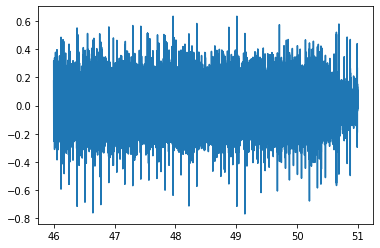

In [21]:
T = x[1] - x[0]

# график сигнала 

plt.figure(1)
plt.plot(x,y)
plt.show()

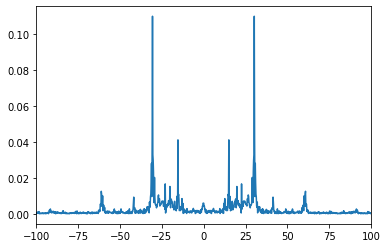

In [25]:
fy = abs(np.fft.fftshift(np.fft.fft(y) * T))
Fs = 1 / T 
d = Fs / N
fx = [d * p for p in range(int(-N / 2 - 1 ), int(N / 2))]
# График амплитуды сигнала

plt.figure(1)
plt.xlim(-100, 100)
plt.plot(fx, fy)